# Fitting camera parameters by objects of given height

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import clickpoints

import CameraTransform as ct

Then we define the intrinsic parameters of the camera:

In [29]:
# intrinsic camera parameters
f = 6.2
sensor_size = (6.17, 4.55)
image_size = (3264, 2448)

# initialize the camera
cam = ct.CameraTransform(f, sensor_size, image_size)

In [8]:
# load the database
db = clickpoints.DataFile("data.cdb")
# define the horizon points
horizon = db.getMarkers(type="horizon")

# fix the horizon for the camera
cam.fixHorizon(horizon)

path data.cdb
Open database with version 18


In [24]:
# define the feet and head points
lines = db.getLines(type="height")
# fit the camera parameters from the feet and heads
p = cam.fitCamParametersFromObjects(lines=lines, object_height=1)

# print the fitted camera parameters
print(cam)

{'tilt': 83.311588137010034}
CameraTransform(
  intrinsic:
    f:		6.2 mm
    sensor:	6.17×4.55 mm
    image:	3264×2448 px
  position:
    x:	0.000000 m
    y:	0.000000 m
    h:	33.993062 m
  orientation:
    tilt:		83.311588°
    roll:		-1.945768°
    heading:	0.000000°
)


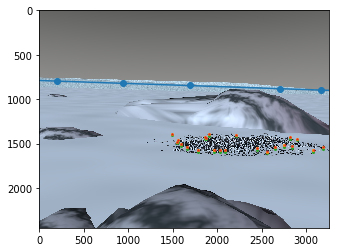

In [26]:
""" plot the results """
# load the image
im = plt.imread("CameraImage.jpg")

# plot the input horizon
plt.plot([h.x for h in horizon], [h.y for h in horizon], 'C0o')
# plot the fitted horizon
horizon_fitted = cam.getImageHorizon()
plt.plot(horizon_fitted[0], horizon_fitted[1], '-C0', ms=2)

# clickpoints lines to arrays
y1 = [np.max([l.y1, l.y2]) for l in lines]
y2 = [np.min([l.y1, l.y2]) for l in lines]
x = [np.mean([l.x1, l.x2]) for l in lines]
feet_cam = np.vstack((x, y1))
heads_cam = np.vstack((x, y2))

# plot the input feet and heads
plt.plot(feet_cam[0], feet_cam[1], 'C2o', label='feet', ms=2)
plt.plot(heads_cam[0], heads_cam[1], 'C1o', label='head', ms=2)

# project the feet to the world
feet_world = cam.transCamToWorld(feet_cam, Z=0)
# the heads are just 1m over the feet
head_world = np.array([feet_world[0], feet_world[1], feet_world[2]+1])
# estimate the heads back in the camera image
head_cam_estimate = cam.transWorldToCam(head_world)

# plot the reconstructed heads
plt.plot(head_cam_estimate[0], head_cam_estimate[1], 'C3+', label='projection', ms=2)

# show the image
plt.imshow(im)

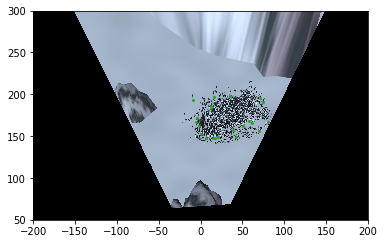

In [27]:
# plot the feet in the world coordinates
feet = cam.transCamToWorld(feet_cam, Z=0)
plt.plot(feet[0, :], feet[1, :], 'C2o', ms=2)

# display a top view of the image
im2 = cam.getTopViewOfImage(im, [-200, 200, 50, 300], scaling=0.1, do_plot=True)